In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data=pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
df = pd.DataFrame(data)
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
df=df.drop(["CustomerID"], axis=1)
df.isnull()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [51]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


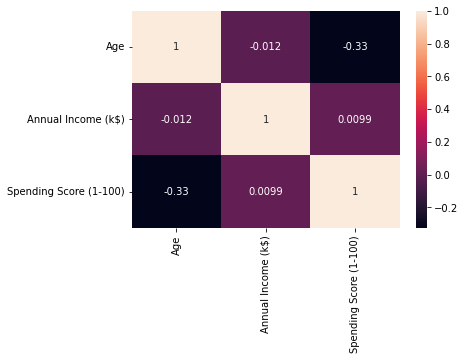

In [53]:
sns.heatmap(df.corr(),annot=True)

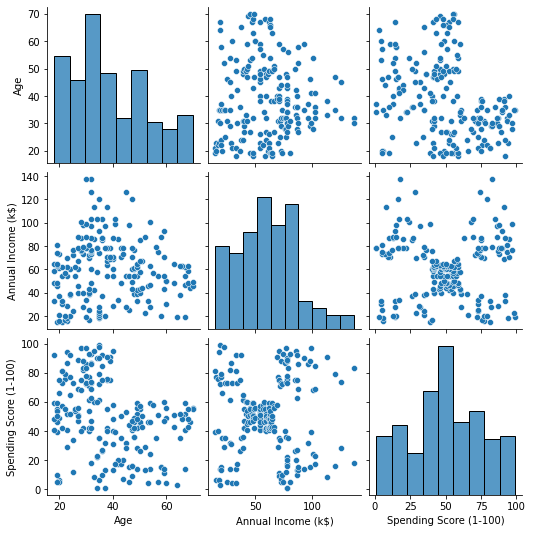

In [54]:
#Mivariate Analysis
sns.pairplot(df)

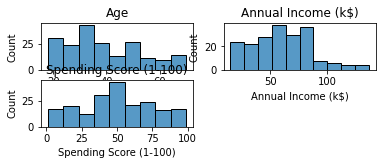

In [55]:
#Univariate Analysis of Continuos Variables
l=list(df.columns)
l1=l[1:]
for i in range(len(l1)):
  plt.subplot(4,2,i+1)
  sns.histplot(df[l1[i]])
  plt.title(f'{l1[i]}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender')

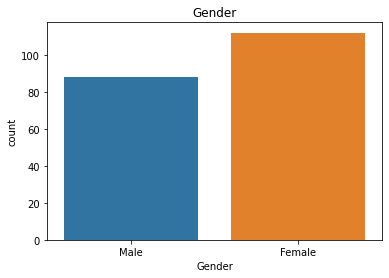

In [56]:
#Univariate Analysis Of Categorical Values
sns.countplot(df['Gender'])
plt.title('Gender')

In [57]:
#Bivariate Analysis of Continuous Variables
df[list(df.columns[2:])].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


In [58]:
#Label Encoding for categorical Values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [59]:
#Outiers Identification And Replacing using Quantile-based Flooring and Capping for continuous variables

q1=df['Age'].quantile(0.10)
q2=df['Age'].quantile(0.90)
df['Age'] = np.where(df['Age'] <q1, q1,df['Age'])
df['Age'] = np.where(df['Age'] >q2, q2,df['Age'])
print(df['Age'].skew())

q1=df['Annual Income (k$)'].quantile(0.10)
q2=df['Annual Income (k$)'].quantile(0.90)
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] <q1, q1,df['Annual Income (k$)'])
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)'] >q2, q2,df['Annual Income (k$)'])
print(df['Annual Income (k$)'].skew())

q1=df['Spending Score (1-100)'].quantile(0.10)
q2=df['Spending Score (1-100)'].quantile(0.90)
df['Spending Score (1-100)'] = np.where(df['Spending Score (1-100)'] <q1, q1,df['Spending Score (1-100)'])
df['Spending Score (1-100)'] = np.where(df['Spending Score (1-100)'] >q2, q2,df['Spending Score (1-100)'])
print(df['Spending Score (1-100)'].skew())

0.281242452772514
-0.11114517936178386
-0.03744215109217243


In [60]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,21.0,23.9,39.0
1,1,21.0,23.9,81.0
2,0,21.0,23.9,13.0
3,0,23.0,23.9,77.0
4,0,31.0,23.9,40.0
...,...,...,...,...
195,0,35.0,93.4,79.0
196,0,45.0,93.4,28.0
197,1,32.0,93.4,74.0
198,1,32.0,93.4,18.0


In [61]:
#Scaling Variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(df)
print(scaled)

[[ 1.12815215 -1.39030724 -1.599128   -0.47229142]
 [ 1.12815215 -1.39030724 -1.599128    1.28936397]
 [-0.88640526 -1.39030724 -1.599128   -1.56284   ]
 [-0.88640526 -1.2301336  -1.599128    1.12158726]
 [-0.88640526 -0.58943902 -1.599128   -0.43034725]
 [-0.88640526 -1.31022042 -1.599128    1.07964309]
 [-0.88640526 -0.26909172 -1.599128   -1.56284   ]
 [-0.88640526 -1.2301336  -1.599128    1.54522344]
 [ 1.12815215  1.6610007  -1.599128   -1.56284   ]
 [-0.88640526 -0.66952584 -1.599128    0.91186639]
 [ 1.12815215  1.6610007  -1.599128   -1.52089582]
 [-0.88640526 -0.26909172 -1.599128    1.54522344]
 [-0.88640526  1.5729052  -1.599128   -1.47895164]
 [-0.88640526 -1.15004677 -1.599128    1.12158726]
 [ 1.12815215 -0.10891808 -1.599128   -1.56284   ]
 [ 1.12815215 -1.31022042 -1.599128    1.20547562]
 [-0.88640526 -0.26909172 -1.599128   -0.64006812]
 [ 1.12815215 -1.39030724 -1.599128    0.66020133]
 [ 1.12815215  1.09238426 -1.599128   -0.89173318]
 [-0.88640526 -0.26909172 -1.59

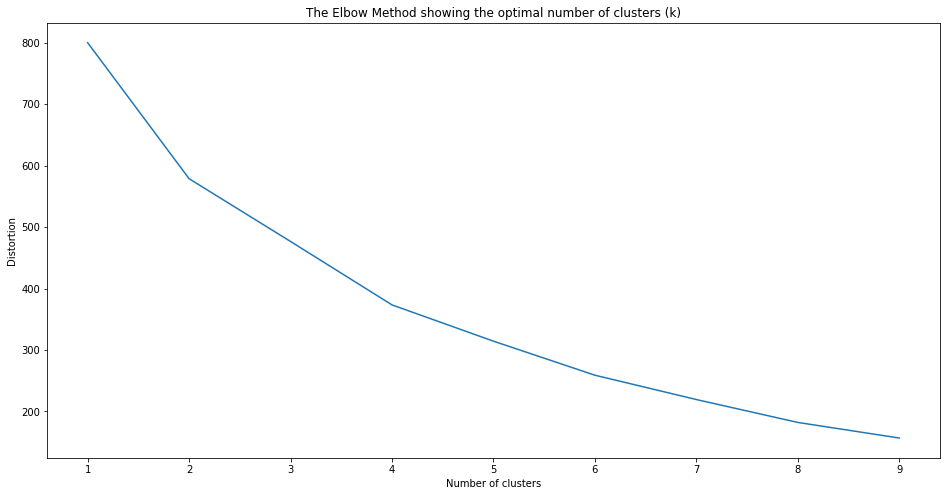

In [62]:
#Elbow methd to find number of clusters
w = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

In [63]:
#Training the model-Support Vectom Regression
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(scaled)
y_pred = kmean.predict(scaled)
df['pred_cluster'] = y_pred
df.head

<bound method NDFrame.head of      Gender   Age  Annual Income (k$)  Spending Score (1-100)  pred_cluster
0         1  21.0                23.9                    39.0             0
1         1  21.0                23.9                    81.0             0
2         0  21.0                23.9                    13.0             2
3         0  23.0                23.9                    77.0             0
4         0  31.0                23.9                    40.0             2
..      ...   ...                 ...                     ...           ...
195       0  35.0                93.4                    79.0             0
196       0  45.0                93.4                    28.0             2
197       1  32.0                93.4                    74.0             0
198       1  32.0                93.4                    18.0             1
199       1  30.0                93.4                    83.0             0

[200 rows x 5 columns]>

In [64]:
#Independent Variables
l2=list(df.columns)
df2=df[l2[:len(l2)-1]]
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,21.0,23.9,39.0
1,1,21.0,23.9,81.0
2,0,21.0,23.9,13.0
3,0,23.0,23.9,77.0
4,0,31.0,23.9,40.0


In [65]:
#Dependent Variables 
df1=df['pred_cluster']
df1

0      0
1      0
2      2
3      0
4      2
      ..
195    0
196    2
197    0
198    1
199    0
Name: pred_cluster, Length: 200, dtype: int32

In [66]:
#Scaling Variables
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit_transform(df)
print(scaled)

[[ 1.12815215 -1.39030724 -1.599128   -0.47229142 -1.02755996]
 [ 1.12815215 -1.39030724 -1.599128    1.28936397 -1.02755996]
 [-0.88640526 -1.39030724 -1.599128   -1.56284     1.29460945]
 [-0.88640526 -1.2301336  -1.599128    1.12158726 -1.02755996]
 [-0.88640526 -0.58943902 -1.599128   -0.43034725  1.29460945]
 [-0.88640526 -1.31022042 -1.599128    1.07964309 -1.02755996]
 [-0.88640526 -0.26909172 -1.599128   -1.56284     1.29460945]
 [-0.88640526 -1.2301336  -1.599128    1.54522344 -1.02755996]
 [ 1.12815215  1.6610007  -1.599128   -1.56284     0.13352474]
 [-0.88640526 -0.66952584 -1.599128    0.91186639 -1.02755996]
 [ 1.12815215  1.6610007  -1.599128   -1.52089582  0.13352474]
 [-0.88640526 -0.26909172 -1.599128    1.54522344 -1.02755996]
 [-0.88640526  1.5729052  -1.599128   -1.47895164  1.29460945]
 [-0.88640526 -1.15004677 -1.599128    1.12158726 -1.02755996]
 [ 1.12815215 -0.10891808 -1.599128   -1.56284     0.13352474]
 [ 1.12815215 -1.31022042 -1.599128    1.20547562 -1.02

In [70]:
#Splitting Dataset
import numpy as np
from sklearn.model_selection import train_test_split
y=df['pred_cluster'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.10, random_state=42)

In [71]:
X_train.shape

(180, 5)

In [72]:
X_test.shape

(20, 5)

In [73]:
y_train.shape

(180,)

In [74]:
y_test.shape

(20,)

In [75]:
#Training the model
from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)

SVR()

In [76]:
#Testing the model
y_pred = regrassor.predict((X_test))

In [77]:
df3 = pd.DataFrame({'Predicted value': y_pred, 'Real Value': y_test})
df3

,Predicted value,Real Value
0,0.004460,0
1,0.071548,0
2,1.097349,1
3,1.045592,1
4,1.089106,1
5,0.015967,0
6,1.948350,2
7,1.075126,1
8,1.885536,2
9,-0.061153,0


In [78]:
#Performance Metrics
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.005100534645501906
0.07141802745457133
